In [1]:
import sys
sys.path.append('python/')

#get the f function from the paper
import dataPython as dp
import numpy as np
import scipy.interpolate as inter
data_bh = dp.getXYdata('NGC5533/NGC5533-blackhole_fmt.txt')
data_bulge = dp.getXYdata('NGC5533/NGC5533-bulge_fmt.txt')
data_disk = dp.getXYdata('NGC5533/NGC5533-disk_fmt.txt')
data_dm = dp.getXYdata('NGC5533/NGC5533-dm_fmt.txt')



#convert to numpy arrays
r_bh = np.asarray(data_bh['xx'])
v_bh = np.asarray(data_bh['yy'])

#smoothing
r_bh = r_bh[r_bh.argsort()]
v_bh = v_bh[r_bh.argsort()]
idx = np.arange(0,np.shape(r_bh)[0])
f_v_bh = inter.InterpolatedUnivariateSpline(r_bh[idx%1==0], v_bh[idx%1==0], k=3)
f_v_bh_v = np.vectorize(f_v_bh)

#convert to numpy arrays
r_b = np.asarray(data_bulge['xx'])
v_b = np.asarray(data_bulge['yy'])

#smoothing
r_b = r_b[r_b.argsort()]
v_b = v_b[r_b.argsort()]
idx = np.arange(0,np.shape(r_b)[0])
f_v_b = inter.InterpolatedUnivariateSpline(r_b[idx%4==0], v_b[idx%4==0], k=3)
f_v_b_v = np.vectorize(f_v_b)

#convert to numpy arrays
r_d = np.asarray(data_disk['xx'])
v_d = np.asarray(data_disk['yy'])

#smoothing
r_d = r_d[r_d.argsort()]
v_d = v_d[r_d.argsort()]
idx = np.arange(0,np.shape(r_d)[0])
f_v_d = inter.InterpolatedUnivariateSpline(r_d[idx%4==0], v_d[idx%4==0], k=3)
f_v_d_v = np.vectorize(f_v_d)

#convert to numpy arrays
r_dm = np.asarray(data_dm['xx'])
v_dm = np.asarray(data_dm['yy'])

#smoothing
r_dm = r_dm[r_dm.argsort()]
v_dm = v_dm[r_dm.argsort()]
idx = np.arange(0,np.shape(r_dm)[0])
f_v_dm = inter.InterpolatedUnivariateSpline(r_dm[idx%4==0], v_dm[idx%4==0], k=3)
f_v_dm_v = np.vectorize(f_v_dm)

f_tot = lambda x: np.sqrt(f_v_dm(x)**2 + f_v_d(x)**2 + f_v_b(x)**2 + f_v_bh(x)**2)
f_tot_v = np.vectorize(f_tot)

data = dp.getXYdata_wXYerr('NGC5533/NGC5533-rot-data_fmt.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

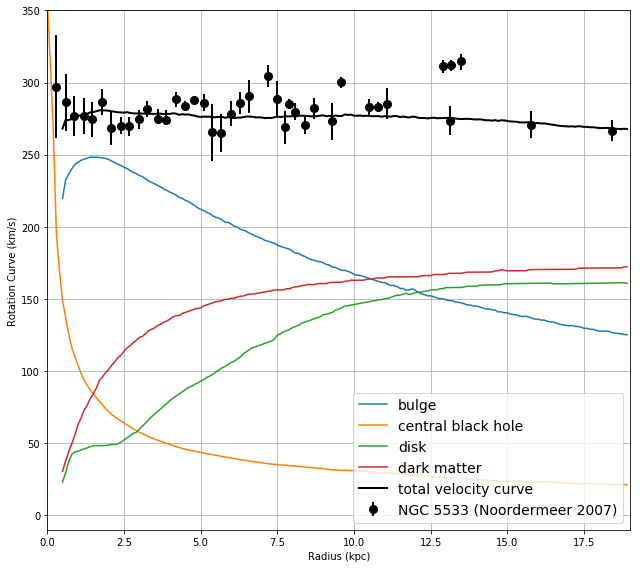

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')


xmax=19
x = np.arange(0,xmax,0.1)
xb = np.arange(0.5,xmax,0.1)
 #functions
    
plt.errorbar(r_dat,v_dat,yerr=[v_err0,v_err1], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='NGC 5533 (Noordermeer 2007)', linewidth=2)
    
plt.plot(xb, f_v_b_v(xb), linestyle='solid', label='bulge') 
plt.plot(x, f_v_bh_v(x), linestyle='solid', label='central black hole')
plt.plot(xb, f_v_d_v(xb), linestyle='solid', label='disk')
plt.plot(xb, f_v_dm_v(xb), linestyle='solid', label='dark matter')
plt.plot(xb, f_tot_v(xb), color='k', linewidth=2,linestyle='solid', label='total velocity curve')

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
ax3.set_ylim(-10,350)
ax3.set_xlim(0,xmax)
#ax3.set(title='Black Hole Rotation Curve')              #labeling axes
ax3.set(xlabel='Radius (kpc)', ylabel='Rotation Curve (km/s)');

plt.legend(loc=4,fontsize=14);                                   #adding legend
plt.tight_layout()
plt.savefig('data_fit_Noordermeer2007.png')
plt.show()